In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [ ]:
from google.colab import files
#uploaded = files.upload()

#Считываем файл
data = pd.read_csv("ramen-ratings.csv")

#Убираем лишние строки
data = data.loc[~data['Stars'].isin(['Unrated'])]

data['Stars'] = data['Stars'].astype(float)

data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN


In [ ]:
#Рассматриваем 3 нужные страны
data_Sing = data[data['Country']=='Singapore']
data_HK = data[data['Country']=='Hong Kong']
data_Mal = data[data['Country']=='Malaysia']
data_country = pd.concat([data_Sing, data_HK, data_Mal])

data_country.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN
15,2565,KOKA,Mushroom Flavour Instant Noodles,Cup,Singapore,3.5,NaN
22,2558,KOKA,Creamy Soup With Crushed Noodles Hot & Sour Fi...,Cup,Singapore,5.0,NaN
29,2551,KOKA,Signature Tom Yum Flavor Instant Noodles,Pack,Singapore,4.0,NaN
35,2545,KOKA,Instant Noodles Laksa Singapura Flavour,Pack,Singapore,5.0,NaN


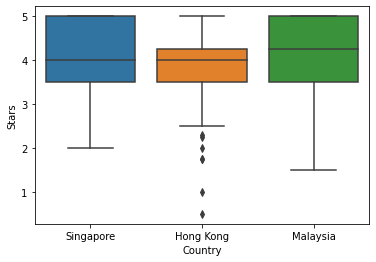

In [ ]:
#Строим график оценок для стран
sns.boxplot(y=data_country['Stars'], x=data_country['Country'])
plt.show()



---


## Критерий Левене 
Используется для проверки того, что выбороки имеют равные дисперсии:

$H_0: \sigma_1^2=\sigma_2^2=...=\sigma_m^2$

$H_1: \sigma_i^2\neq\sigma_j^2, i\neq j$

$ $

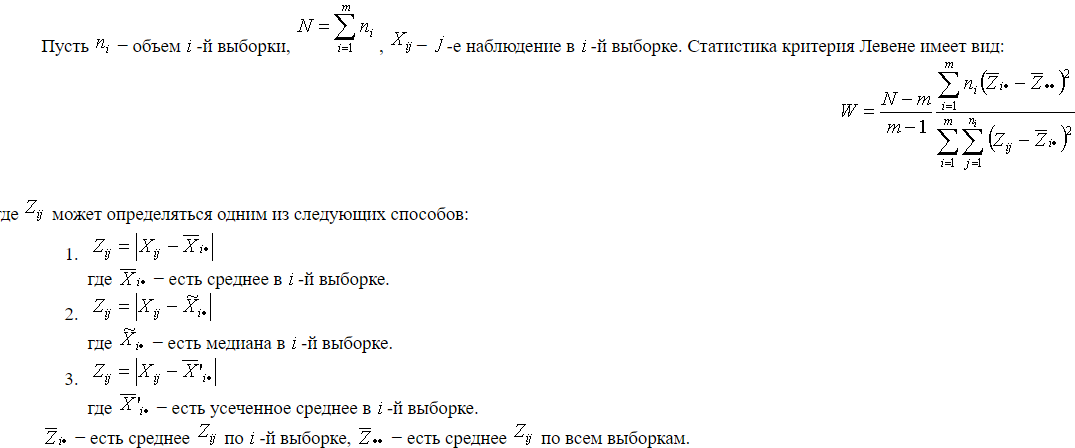

In [ ]:
Levres = stats.levene(data_country['Stars'][data_country['Country'] == 'Singapore'],
             data_country['Stars'][data_country['Country'] == 'Hong Kong'],
             data_country['Stars'][data_country['Country'] == 'Malaysia'])

print("Значение статистики\t= %f\nЗначение pvalue \t= %f\n"%(Levres))
if Levres[1] < 0.05:
  print("Дисперсии выборок не сопадают")
else:
  print("Дисперсии выборок совпадают")

Значение статистики	= 1.059984
Значение pvalue 	= 0.347437

Дисперсии выборок совпадают




---

## Критерий Шапиро-Уилка
Используется для проверки гипотезы $H_0$: «случайная величина $X$ распределена нормально»


$ $

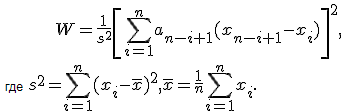

In [ ]:
#критерий Шапиро-Уилка для наших выборок
sh_S = stats.shapiro(data_country['Stars'][data_country['Country'] == 'Singapore'])
sh_HK = stats.shapiro(data_country['Stars'][data_country['Country'] == 'Hong Kong'])
sh_M = stats.shapiro(data_country['Stars'][data_country['Country'] == 'Malaysia'])

print("Критерий Шапиро-Уилка для выборок\nSingapore:\tЗначние статистики = %f, Значение pvalue = %e\nHong Kong:\tЗначние статистики = %f, Значение pvalue = %e\nMalaysia:\tЗначние статистики = %f, Значение pvalue = %e"%(sh_S + sh_HK + sh_M))

#k-количество выборок не с нормальным распределением
k=0
for i in (sh_S, sh_HK, sh_M):
  if i[1] < 0.05:
    k+=1
if k == 3:
  print("\nВсе выборки не имеют нормального распределения")
if k == 0:
  print("\nВсе выборки имеют нормальное распределение")

Критерий Шапиро-Уилка для выборок
Singapore:	Значние статистики = 0.893885, Значение pvalue = 2.895108e-07
Hong Kong:	Значние статистики = 0.918780, Значение pvalue = 4.968322e-07
Malaysia:	Значние статистики = 0.879713, Значение pvalue = 6.961284e-10

Все выборки не имеют нормального распределения




---
## Критерий Краскела-Уоллиса 
$H_0: F_1(x)=...=F_k(x)$

$H_1: F_1(x)=F_2(x-\Delta_1)=...=F_k(x-\Delta_{K-1})$

Упорядочим все элементы выьборок и отетим ранг $j-ого$ элемента $i-ой$ выборки как $R_{ij}$. Тогда
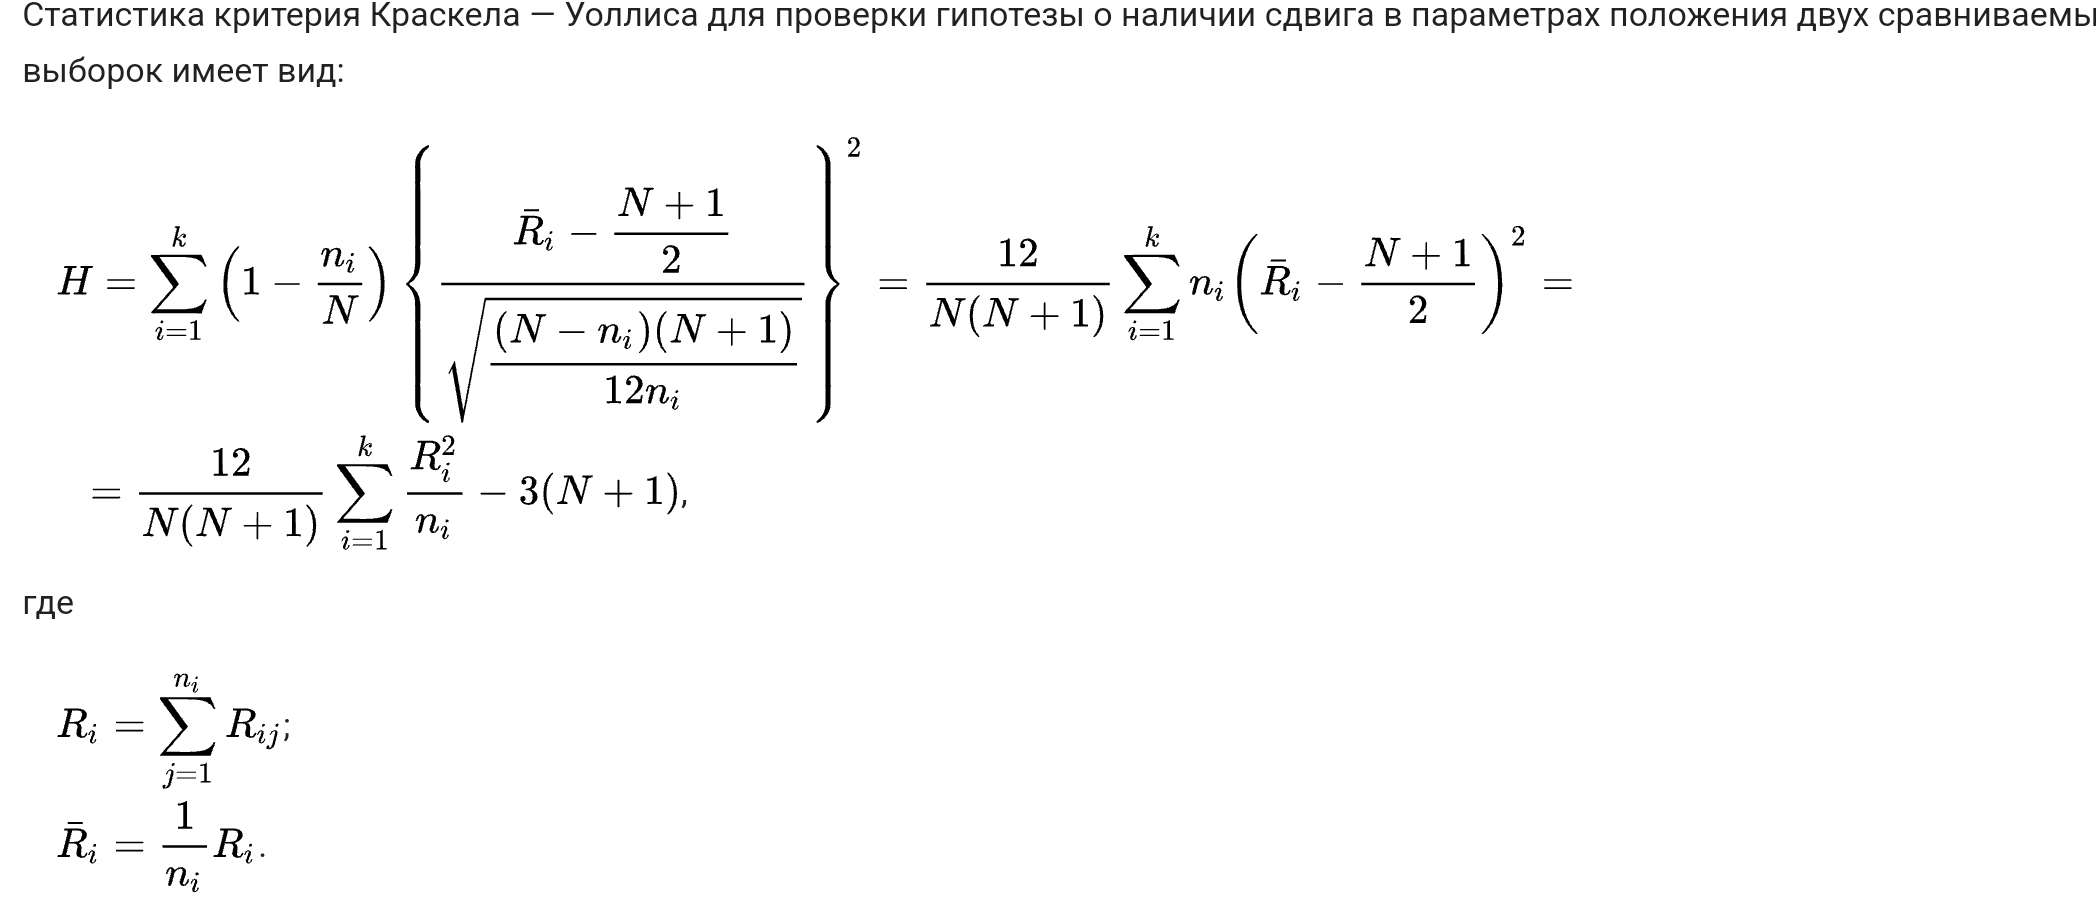
Используется для сравнения трех или более выборок, и проверяет нулевые гипотезы, согласно которым различные выборки были взяты из одного и того же распределения, или из распределений с одинаковыми медианами.

Его назначение состоит в том, чтобы ответить на вопрос относятся ли все наблюдения к одной генеральной совокупности, или же имеются значимо отличающиеся от других группы (какие – не ясно).
Если метод не обнаруживает различий между группами, тогда не имеет смысл проводить дальнейшие сравнения – и так ясно, что наблюдаемые различия могут быть с высокой вероятностью объяснены случайными факторами. Если же тест позволяет говорить о наличии каких-то различий между группами, то вслед за ним можно проводить дальнейшие уточняющие сравнения (post-hoc tests) для установления того, какие же группы отличаются.

In [ ]:
#Критерий Краскела-Уоллиса для наших выборок
Krusres = stats.kruskal(data_country['Stars'][data_country['Country'] == 'Singapore'],
             data_country['Stars'][data_country['Country'] == 'Hong Kong'],
             data_country['Stars'][data_country['Country'] == 'Malaysia'])

print("Значение статистики\t= %f\nЗначение pvalue \t= %f\n"%(Krusres))
if Krusres[1] < 0.05:
  print("Медианы выборок не сопадают")
else:
  print("Медианы выборок совпадают")

Значение статистики	= 11.729746
Значение pvalue 	= 0.002837

Медианы выборок не сопадают


После получения утвердительного результата о наличии различий в группах в результате проведения обобщенного теста можно переходить к тестированию различий между группами.


---


## Итого 
Выборки имеют одинаковую дисперсию, но различные медианы и не совпадают с нормальным распределением.  

**Тест Тьюки** – это специализированный параметрический post-hoc тест для проведения всех попарных сравнений . В этом тесте автоматически делается поправка на множественность сравнения. Но его нельзя применить ввиду не нормальных распределний.


**Тест Данна** является специализированным непараметрическим post-hoc тестом (для сравнений после теста Краскела-Уоллиса). По умолчанию он осуществляет все попарные сравнения. Однако если исследователя интересует только определенный (заранее выбранный) набор сравнений, то можно удалить из полученной таблицы ненужные результаты сравнения, чтобы применить поправки только к запланированному набору значений p-value.

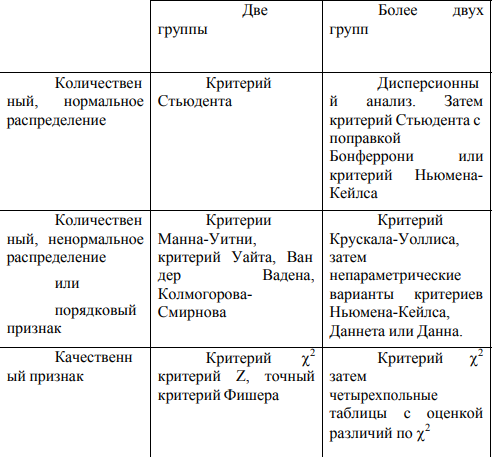

In [ ]:
pip install scikit_posthocs

In [ ]:
import scikit_posthocs as spp
DC = [data_country['Stars'][data_country['Country'] == 'Singapore'],
      data_country['Stars'][data_country['Country'] == 'Hong Kong'],
      data_country['Stars'][data_country['Country'] == 'Malaysia']]



---


# Тест Данна
$H_{0ij}$ отвергается, на уровне значимости $\alpha$, если 
$$|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |>z_{\alpha/k(k-1)}\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}$$
 Значение $p_{value}$ вычисляется так
 $$
 p_{value} = k(k-1)\cdot\mathsf{P}\left(N(0,1)> \frac{|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |}{\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}}\right)
 $$

In [ ]:
#Тест Данна
Dunn = spp.posthoc_dunn(DC, p_adjust='fdr_bh')

for i in range(1, len(Dunn)+1):
  for j in range(i+1, len(Dunn)+1):
    if float(Dunn[i][j]) < 0.05:
      print("Есть статистически значимая разница между группами %d и %d"%(i, j))
print()
Dunn

Есть статистически значимая разница между группами 1 и 2
Есть статистически значимая разница между группами 2 и 3



,1,2,3
1,1.000000,0.013611,0.742938
2,0.013611,1.000000,0.004044
3,0.742938,0.004044,1.000000


Гонконг выделяется


---
Созданим таблицу сопряженности и прменим тест Хи-квадрат

Чтобы оценить значимость различий между факторами.


In [ ]:
#Рассмотрим таблицу оценок по странам
Ctab = pd.crosstab(data_country['Stars'], data_country['Country'], margins = False) 
print(Ctab) 

Country  Hong Kong  Malaysia  Singapore
Stars                                  
0.50             1         0          0
1.00             1         0          0
1.50             0         1          0
1.75             2         0          0
2.00             1         3          1
2.25             1         0          0
2.30             1         0          0
2.50             6         4          4
2.75             5         1          2
2.90             0         1          0
3.00            11         5          4
3.25             5         8          3
3.50            11        19         14
3.75            14        19         16
4.00            42        16         15
4.25             5         5          8
4.30             1         0          0
4.50             5        14          4
4.75             3         5          2
5.00            22        54         36


In [ ]:
#Критерий Хи-квадрат
X2 = sp.stats.chi2_contingency(Ctab)
print("Значение статистики\t= %f\nЗначение pvalue \t= %f\n"%(X2[0], X2[1]))
print(*X2[3], sep='\n')

if X2[1] < 0.05:
  print("\nЕсть отличия по качеству рамена")
else:
  print("Нет отличий по качеству рамена")

Значение статистики	= 65.983535
Значение pvalue 	= 0.003252

[0.34164589 0.38653367 0.27182045]
[0.34164589 0.38653367 0.27182045]
[0.34164589 0.38653367 0.27182045]
[0.68329177 0.77306733 0.5436409 ]
[1.70822943 1.93266833 1.35910224]
[0.34164589 0.38653367 0.27182045]
[0.34164589 0.38653367 0.27182045]
[4.78304239 5.41147132 3.80548628]
[2.73316708 3.09226933 2.17456359]
[0.34164589 0.38653367 0.27182045]
[6.83291771 7.73067332 5.43640898]
[5.46633416 6.18453865 4.34912718]
[15.03241895 17.0074813  11.96009975]
[16.74064838 18.94014963 13.319202  ]
[24.94014963 28.21695761 19.84289277]
[6.14962594 6.95760599 4.89276808]
[0.34164589 0.38653367 0.27182045]
[7.85785536 8.89027431 6.25187032]
[3.41645885 3.86533666 2.71820449]
[38.26433915 43.29177057 30.44389027]

Есть отличия по качеству рамена


# Вывод
1) Есть отличия по качеству

2) Гонконг выделяется

3) По построенному прежде графику видно, что в Гонконге оценки ниже

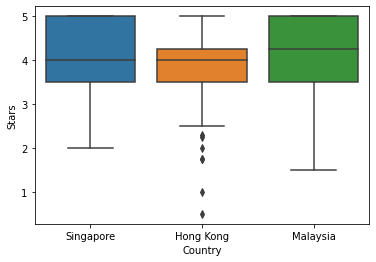


Значит в Гонконге качетсво рамена в среднем хуже, чем в Малайзии и Сингапуре

Сравним средние для Малайзии и Сингапура:

In [ ]:
#Проверим наш вывод сранив медианы при помощи критерия Краскела-Уоллиса
Krusres_2 = stats.kruskal(data_country['Stars'][data_country['Country'] == 'Singapore'],
             data_country['Stars'][data_country['Country'] == 'Malaysia'])
print("Значение статистики\t= %f\nЗначение pvalue \t= %f\n"%(Krusres_2))
if Krusres_2[1] < 0.05:
  print("Медианы выборок не сопадают")
else:
  print("Медианы выборок совпадают")

Значение статистики	= 0.097208
Значение pvalue 	= 0.755206

Медианы выборок совпадают
